In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv("prep.csv",index_col=None)

In [3]:
df2=dataset
df2=pd.get_dummies(df2,drop_first=True)

In [4]:
df2

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,0,0,0,0,0,0,1,1,0,1
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,1,0,0,0,0,0,1,0,0,1
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,1,0,0,0,0,0,1,0,0,1
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,1,0,0,0,0,0,1,0,1,1
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,1,0,0,0,0,0,1,0,0,1
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,1,0,0,1,1,0,1,0,1,1
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,1,0,0,1,1,0,0,0,0,1
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,1,0,0,1,1,0,1,0,1,1


In [5]:
df2.shape

(399, 28)

In [6]:
indep_X=df2.drop("classification_yes",axis=1)
dep_Y=df2["classification_yes"]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(indep_X,dep_Y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
rf_model=RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf_model=rf_model.fit(x_train_scaled,y_train)

feature importances

In [14]:
feature_importances=list(rf_model.feature_importances_)
feature_importances

[0.02345613569480969,
 0.0026892262395733675,
 0.08422140226242984,
 0.0,
 0.02396897676710053,
 0.05375645339964211,
 0.038197236196475366,
 0.03991830099538806,
 0.003057605595234331,
 0.17997590656820436,
 0.32466419079274234,
 0.0035196268723462517,
 0.12634883937934901,
 0.001214775323686215,
 0.01194996286463879,
 0.01997970595763808,
 0.0,
 0.0014527439425983406,
 0.004219886783939369,
 0.0012572479116928802,
 0.0,
 0.03906111690683461,
 0.00911379960537812,
 0.0,
 0.0012961940082590296,
 0.0037567656849541316,
 0.0029239002470853167]

In [15]:
feature_importances_sorted = sorted(zip(indep_X.columns, feature_importances),key=lambda x: x[1], reverse=True)
for feature,importance in feature_importances_sorted:
    print(f'{feature}:{importance }')

pcv:0.32466419079274234
hrmo:0.17997590656820436
rc:0.12634883937934901
al:0.08422140226242984
bu:0.05375645339964211
sod:0.03991830099538806
htn_yes:0.03906111690683461
sc:0.038197236196475366
bgr:0.02396897676710053
age:0.02345613569480969
sg_d:0.01997970595763808
sg_c:0.01194996286463879
dm_yes:0.00911379960537812
pc_normal:0.004219886783939369
pe_yes:0.0037567656849541316
wc:0.0035196268723462517
pot:0.003057605595234331
ane_yes:0.0029239002470853167
bp:0.0026892262395733675
rbc_normal:0.0014527439425983406
appet_yes:0.0012961940082590296
pcc_present:0.0012572479116928802
sg_b:0.001214775323686215
su:0.0
sg_e:0.0
ba_present:0.0
cad_yes:0.0


In [11]:
#Extract features and importance scores separately from sorted list
features_sorted,importance_scores_sorted=zip(*feature_importances_sorted)

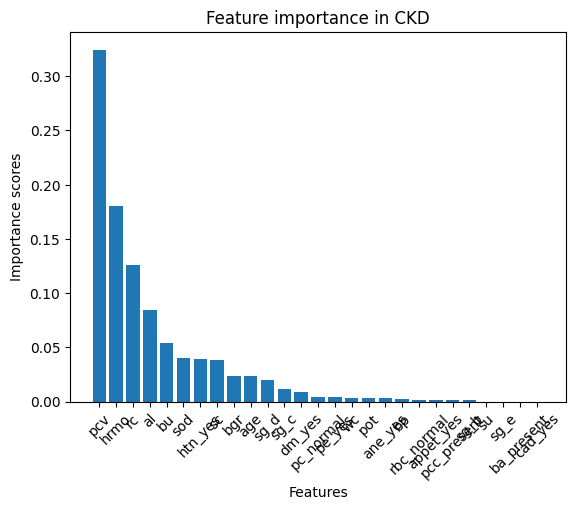

In [16]:
#plotting feature importance
plt.bar(features_sorted,importance_scores_sorted)
plt.xlabel("Features")
plt.ylabel("Importance scores")
plt.title("Feature importance in CKD")

#Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


In [17]:
def log_model_feature(x_train_scaled,y_train,threshold=0.1):
    log_model=LogisticRegression(solver='lbfgs')
    Log_model=log_model.fit(x_train_scaled,y_train)
    #Get feature importances
    feature_importances=list(Log_model.coef_)
    #create a sorted list of feature importances
    feature_importances_sorted=sorted(zip(indep_X.columns, feature_importances),key=lambda x: x[1], reverse=True)
    for feature,importance in feature_importances_sorted:
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        log_features = [feature for feature, importance in feature_importances_sorted if any(np.array(importance) > threshold)]
        print(log_features)
        return log_features

def DecisionTree_feature(x_train_scaled,y_train,threshold=0.1):
    dt_model=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state = 0)
    Dt_model=dt_model.fit(x_train_scaled,y_train)
    #Get feature importances
    feature_importances=list(Dt_model.feature_importances_)
    #create a sorted list of feature importances
    feature_importances_sorted=sorted(zip(indep_X.columns, feature_importances),key=lambda x: x[1], reverse=True)
    for feature,importance in feature_importances_sorted:
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        Dt_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        print(Dt_features)
        return Dt_features

def SVML_feature(x_train_scaled,y_train,threshold=0.1):
    SVM=SVC(kernel = 'linear', random_state = 0)
    SVM_model=SVM.fit(x_train_scaled,y_train)
    #Get feature importances
    feature_importances=list(SVM_model.coef_)
    #create a sorted list of feature importances
    feature_importances_sorted=sorted(zip(indep_X.columns, feature_importances),key=lambda x: x[1], reverse=True)
    for feature,importance in feature_importances_sorted:
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        svml_features = [feature for feature, importance in feature_importances_sorted if any(np.array(importance) > threshold)]
        print(svml_features)
        return svml_features

def SVMNL_feature(x_train_scaled,y_train,threshold=0.1):
    svm_model=SVC(kernel="rbf",random_state = 0)
    SVMNL_model=svm_model.fit(x_train_scaled,y_train)
    #Get feature importances
    support_vector_indices=list(SVMNL_model.support_)
    support_vector_coefficients=abs(SVMNL_model.dual_coef_)
    feature_importances={feature_index: coefficient for feature_index, coefficient in zip(support_vector_indices,support_vector_coefficients[0])}
    #create a sorted list of feature importances
    sorted_features=sorted(feature_importances.items(),key=lambda x: x[1], reverse=True)
    print("feature_importances")
    for feature_index,importance in sorted_features:
        svmnl_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        print(svmnl_features)
        return svmnl_features

def random_feature(x_train_scaled,y_train,threshold=0.1):
    rf_model=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2,random_state = 0)
    rf_model=rf_model.fit(x_train_scaled,y_train)
    #Get feature importances
    feature_importances=list(rf_model.feature_importances_)
    #create a sorted list of feature importances
    feature_importances_sorted=sorted(zip(indep_X.columns, feature_importances),key=lambda x: x[1], reverse=True)
    for feature,importance in feature_importances_sorted:
        features_sorted,importance_scores_sorted = zip(*feature_importances_sorted)
        rf_selected_features = [feature for feature, importance in feature_importances_sorted if importance > threshold]
        print(rf_selected_features)
        return rf_selected_features 


In [18]:
log_features=log_model_feature(x_train_scaled,y_train,threshold=0.3)
#log_features=result1
print(log_features)

['age']
['age']


In [19]:
DT_features=DecisionTree_feature(x_train_scaled,y_train,threshold=0.3)
#DT_features=result2
print(DT_features)

['hrmo']
['hrmo']


In [20]:
svml_features=SVML_feature(x_train_scaled,y_train,threshold=0.3)
#svmnl_features=result3
print(svml_features)

['age']
['age']


In [21]:
svmnl_features=SVMNL_feature(x_train_scaled,y_train,threshold=0.3)
#svmnl_features=result4
print(svmnl_features)

feature_importances
['pcv']
['pcv']


In [22]:
rf_selected_features=random_feature(x_train_scaled,y_train,threshold=0.3)
#rf_selected_features=result5
print(rf_selected_features)

['pcv']
['pcv']


In [32]:
def log_input(log_features):
    feature_indices = [indep_X.columns.get_loc(feature)for feature in log_features]
    x_train_current ={feature:x_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    x_test_current ={feature:x_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    log_X_train= np.column_stack(list(x_train_current.values()))
    log_X_test= np.column_stack(list(x_test_current.values()))
    return log_X_train,log_X_test

def DT_input(DT_features):
    feature_indices = [indep_X.columns.get_loc(feature)for feature in DT_features]
    x_train_current ={feature:x_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    x_test_current ={feature:x_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    DT_X_train= np.column_stack(list(x_train_current.values()))
    DT_X_test= np.column_stack(list(x_test_current.values()))
    return DT_X_train,DT_X_test

def svml_input(svml_features):
    feature_indices = [indep_X.columns.get_loc(feature)for feature in svml_features]
    x_train_current ={feature:x_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    x_test_current ={feature:x_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    svml_X_train= np.column_stack(list(x_train_current.values()))
    svml_X_test= np.column_stack(list(x_test_current.values()))
    retur svml_X_train,svml_X_test

def svmnl_input(svmnl_features):
    feature_indices = [indep_X.columns.get_loc(feature)for feature in svmnl_features]
    x_train_current ={feature:x_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    x_test_current ={feature:x_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    svmnl_X_train= np.column_stack(list(x_train_current.values()))
    svmnl_X_test= np.column_stack(list(x_test_current.values()))
    return svmnl_X_train,svmnl_X_test

def rf_input(rf_selected_features):
    feature_indices = [indep_X.columns.get_loc(feature)for feature in rf_selected_features]
    x_train_current ={feature:x_train_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    x_test_current ={feature:x_test_scaled[:, int(index)] for feature, index in zip(log_features, feature_indices)}
    rf_x_train_current_array= np.column_stack(list(x_train_current.values()))
    rf_x_test_current_array= np.column_stack(list(x_test_current.values()))
    return rf_x_train_current_array,rf_x_test_current_array

SyntaxError: invalid syntax (3854896678.py, line 23)

In [33]:
log_X_train,log_X_test=log_input(log_features)
print(log_X_train)
print(log_X_test)

[[-2.82621561]
 [-2.10592356]
 [ 1.43551235]
 [ 0.47512295]
 [-0.00507175]
 [-1.08550982]
 [ 0.47512295]
 [ 1.195415  ]
 [-0.48526645]
 [-0.7253638 ]
 [ 0.41509862]
 [ 1.01534199]
 [-0.42524211]
 [ 0.29504994]
 [ 0.2350256 ]
 [ 1.43551235]
 [ 1.73563404]
 [ 0.65519597]
 [ 0.95531765]
 [-0.96546115]
 [ 0.47512295]
 [-0.48526645]
 [-2.10592356]
 [-1.08550982]
 [-0.2451691 ]
 [-2.6461426 ]
 [-1.98587488]
 [-0.30519343]
 [ 1.195415  ]
 [-0.03554564]
 [-0.36521777]
 [ 0.05495259]
 [ 0.7152203 ]
 [ 1.6756097 ]
 [ 0.77524464]
 [-1.08550982]
 [-0.90543681]
 [ 0.7152203 ]
 [ 0.77524464]
 [ 0.65519597]
 [-0.12512042]
 [-0.48526645]
 [-2.10592356]
 [ 0.47512295]
 [-1.86582621]
 [ 1.25543934]
 [ 1.13539067]
 [-0.03554564]
 [ 1.55556103]
 [ 1.6756097 ]
 [ 0.83526898]
 [-0.2451691 ]
 [ 0.95531765]
 [-0.00507175]
 [-0.42524211]
 [ 0.11497693]
 [ 0.17500127]
 [ 1.13539067]
 [ 0.41509862]
 [ 1.195415  ]
 [-1.62572886]
 [-0.30519343]
 [ 0.7152203 ]
 [-0.18514476]
 [ 0.17500127]
 [ 0.17500127]
 [-1.14553

In [34]:
x_train_current_array,x_test_current_array=rf_input(rf_selected_features)
print(x_train_current_array)
print(x_test_current_array)

[[ 0.01620401]
 [ 1.48638031]
 [ 0.01620401]
 [ 0.01620401]
 [ 1.60757101]
 [ 0.01620401]
 [-0.69505243]
 [ 0.01620401]
 [ 1.12280818]
 [ 0.01620401]
 [-0.45267101]
 [ 1.3651896 ]
 [-1.17981526]
 [-0.33148031]
 [-0.81624314]
 [-1.05862455]
 [-0.45267101]
 [-0.57386172]
 [ 0.01620401]
 [-0.33148031]
 [ 0.01620401]
 [ 0.27447323]
 [ 1.60757101]
 [ 1.12280818]
 [ 0.63804535]
 [ 0.27447323]
 [ 0.01620401]
 [-0.69505243]
 [ 0.01620401]
 [ 0.01620401]
 [ 0.63804535]
 [ 0.01620401]
 [ 1.24399889]
 [ 1.24399889]
 [ 0.39566394]
 [ 0.01620401]
 [ 1.12280818]
 [ 0.01620401]
 [ 0.01620401]
 [-0.81624314]
 [-1.30100597]
 [ 1.3651896 ]
 [ 0.27447323]
 [-0.45267101]
 [-1.9069595 ]
 [-1.05862455]
 [ 0.39566394]
 [ 0.01620401]
 [-1.7857688 ]
 [ 1.12280818]
 [-0.69505243]
 [-0.81624314]
 [-2.75529446]
 [ 0.51685465]
 [-1.05862455]
 [ 0.01620401]
 [ 0.27447323]
 [-0.45267101]
 [ 0.88042677]
 [ 0.03209182]
 [ 1.12280818]
 [ 1.60757101]
 [ 0.39566394]
 [-1.7857688 ]
 [ 0.01620401]
 [ 0.01620401]
 [ 0.15328

In [35]:
log_model=LogisticRegression(solver='lbfgs')
dt_model=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state = 0)
SVM=SVC(kernel = 'linear', random_state = 0)
svm_model=SVC(kernel="rbf",random_state = 0)
rf_model=RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2,random_state = 0)

In [36]:
def LOGIS_model(log_X_train,log_X_test,y_train,y_test,log_model):
    log_model.fit(log_X_train,y_train)
    y_pred=log_model.predict(log_X_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

def DecTree_model(DT_X_train,DT_X_test,y_train,y_test,dt_model):
    dt_model.fit(DT_X_train,y_train)
    y_pred=dt_model.predict(DT_X_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy
    
def SVML_model(svml_X_train,svml_X_test,y_train,y_test,SVM):
    SVM_model.fit(svml_X_train,y_train)
    y_pred=SVM.predict(svml_X_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

def SVMNL_model(svmnl_X_train,svmnl_X_test,y_train,y_test,svm):
    SVM_model.fit(svmnl_X_train,y_train)
    y_pred=svm.predict(svmnl_X_test)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

def random_forest(x_train_current_array,x_test_current_array,y_train,y_test,rf_model):
    rf_model.fit(x_train_current_array,y_train)
    y_pred=rf_model.predict(x_test_current_array)
    accuracy=accuracy_score(y_test,y_pred)
    return accuracy

In [37]:
log_acc=LOGIS_model(log_X_train,log_X_test,y_train,y_test,log_model)
print(f'Accuracy:{log_acc}')

Accuracy:0.525


In [38]:
Dec_acc=DecTree_model(DT_X_train,DT_X_test,y_train,y_test,dt_model)
print(f'Accuracy:{Dec_acc}')

NameError: name 'DT_X_train' is not defined

In [39]:
Svm_acc=SVML_model(svml_X_train,svml_X_test,y_train,y_test,SVM)
print(f'Accuracy:{Svm_acc}')

NameError: name 'svml_X_train' is not defined